# RiceLeaf - Business Case



- In the dynamic field of agriculture, managing issues like crop illnesses is critical to maintaining food security. The emergence of several leaf diseases is a common problem that impacts rice crops globally and can have a substantial effect on production.    

- Using state-of-the-art technology to counter this problem, a viable option is the use of Convolutional Neural Networks (CNN) for rice leaf disease prediction. By utilizing CNN, we provide farmers with an advanced instrument that examines photos of rice leaves and identifies minute patterns suggestive of illnesses.     

- By facilitating prompt intervention and supporting early diagnosis, this revolutionary technology empowers farmers to take proactive steps to stop the spread of illness and improve crop health.     

- Preventing disease can result in a large decrease in crop losses, possibly saving up to 30% of annual yields with a proactive approach to disease management.      

- In addition to safeguarding the availability of rice, this also involves ensuring food security for the communities that depend on these crops. By utilizing predictive technologies, we are ensuring agriculture has a sustainable future in addition to embracing innovation.      

- Essentially, this business case is about more than just making a profit; it's about building resilience in our food systems and giving farmers the resources they need to prosper in an uncertain climate.     

- Additionally, from a societal standpoint, by guaranteeing a steady and reliable supply of rice, the use of CNN for rice leaf disease prediction promotes global food security. We strengthen the resilience of agricultural systems and lower the risk of food shortages and price volatility by proactively addressing crop diseases.     

# RiceLeaf - Domain Analysis

- In this project we are motivated to handle the data to detect three imports issues to tackle the health of the rice leaves.
    - (i) Leaf smut
    - (ii) Brown spot
    - (iii) Bacterial leaf blight
- Data contains a total of 119 images, equally distributed among three diseases.

## Bacterial Leaf Blight :

- Cause:
Caused by the bacterium Xanthomonas oryzae pv. oryzae.
- Symptoms:
Water-soaked lesions that elongate and turn yellow, leading to wilting and death of the affected leaf tips.
- Impact:
Considered a major threat, leading to yield losses. Management involves planting resistant varieties and applying appropriate cultural practices.

## Brown Spot :

- Cause:
Caused by the fungus Bipolaris oryzae.
- Symptoms:
Small, brown spots with a yellow halo on leaves. Lesions may coalesce under favorable conditions.
- Impact:
While it may not cause severe yield losses, it can reduce grain quality. Disease management involves planting resistant varieties and using fungicides if necessary.

## Leaf Smut :

- Cause:
Pathogen: Ustilaginoidea virens, a fungal pathogen.
- Symptoms:
    - Early Stage: Initial symptoms include small, whitish to greenish lesions on rice leaf blades.
    - Later Stage: Lesions progress to form characteristic false smut balls or spore masses. These masses are initially green and can later turn shades of olive, brown, or black.
    - Spore Masses: The spore masses replace infected grains and give affected panicles the appearance of a cluster of smutted grains.
- Impact:
Yield Loss: Leaf smut can result in significant yield losses if not managed.
Grain Quality: The disease can impact grain quality, affecting the economic value of the rice crop.

## An Approach of CNN Implementation
- import the libraries and the dataset
- Image Visualization
- Data Preprocessing
- Rescaling the image pixel by 255
- Dividing the dataset into training,validation and testing
- Model Architecture
- Compile the model
- Model training and testing
- Load the model with the Best Validation Accuracy
- Visualise some predictions

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import os
import zipfile
from PIL import Image

In [3]:
with zipfile.ZipFile('Bacterial leaf blight-20200814T055237Z-001.zip','r') as zip_ref:
    zip_ref.extractall("Bacterial leaf blight")

In [4]:
with zipfile.ZipFile('Brown spot-20200814T055208Z-001.zip','r') as zip_ref:
    zip_ref.extractall("Brown spot")

In [5]:
with zipfile.ZipFile('Leaf smut-20200814T055530Z-001.zip','r') as zip_ref:
    zip_ref.extractall("Leaf smut")

## Import the dataset

In [6]:
def load_images_from_folder(folder_path,target_size=(224,224)):
    images = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path,class_folder)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path,image_file)
            img = Image.open(image_path).resize(target_size)
            images.append((np.array(img),class_folder))
    return images
images_dir1 = load_images_from_folder('Bacterial leaf blight')
images_dir2 = load_images_from_folder('Brown spot')
images_dir3 = load_images_from_folder('Leaf smut')

- A folder containing three different types of images classification and split them accordingly.

## Image Visualization

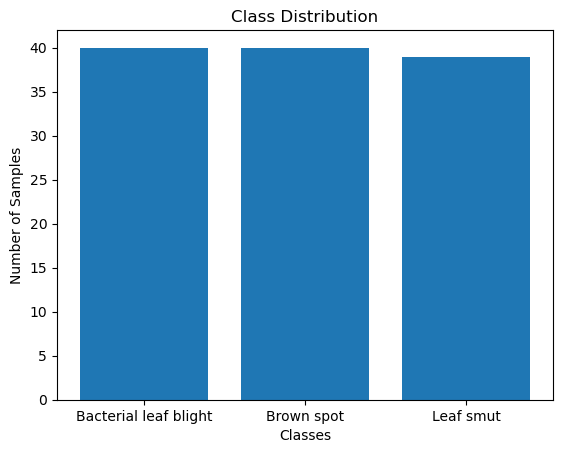

In [7]:
class_counts = {class_name: len(images) for class_name,images in{
    'Bacterial leaf blight': images_dir1,
    'Brown spot' : images_dir2,
    'Leaf smut' : images_dir3
}.items()}
plt.bar(class_counts.keys(),class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

- From this data Visualization we can observe there are total number of 119 images.
- 40 images are available in Bacterial leaf blight and Brown spot
- 39 images are available in Leaf smut

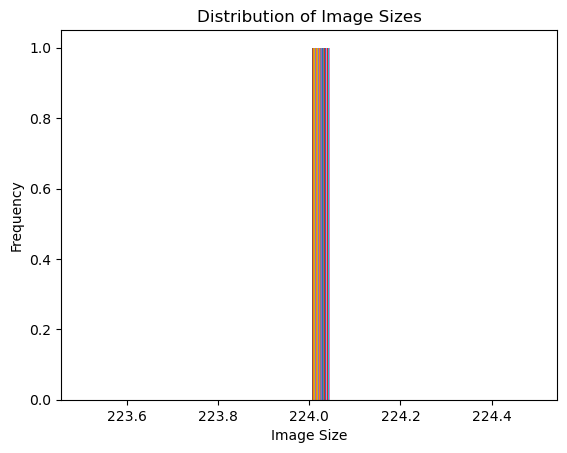

In [8]:
image_sizes = [img.shape[:1] for img,_ in images_dir1+images_dir2+images_dir3]
plt.hist(image_sizes,bins = 20)
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.title('Distribution of Image Sizes')
plt.show()

In [9]:
no_of_samples = 20
dir1_set = images_dir1[:no_of_samples]
dir2_set = images_dir2[:no_of_samples]
dir3_set = images_dir3[:no_of_samples]

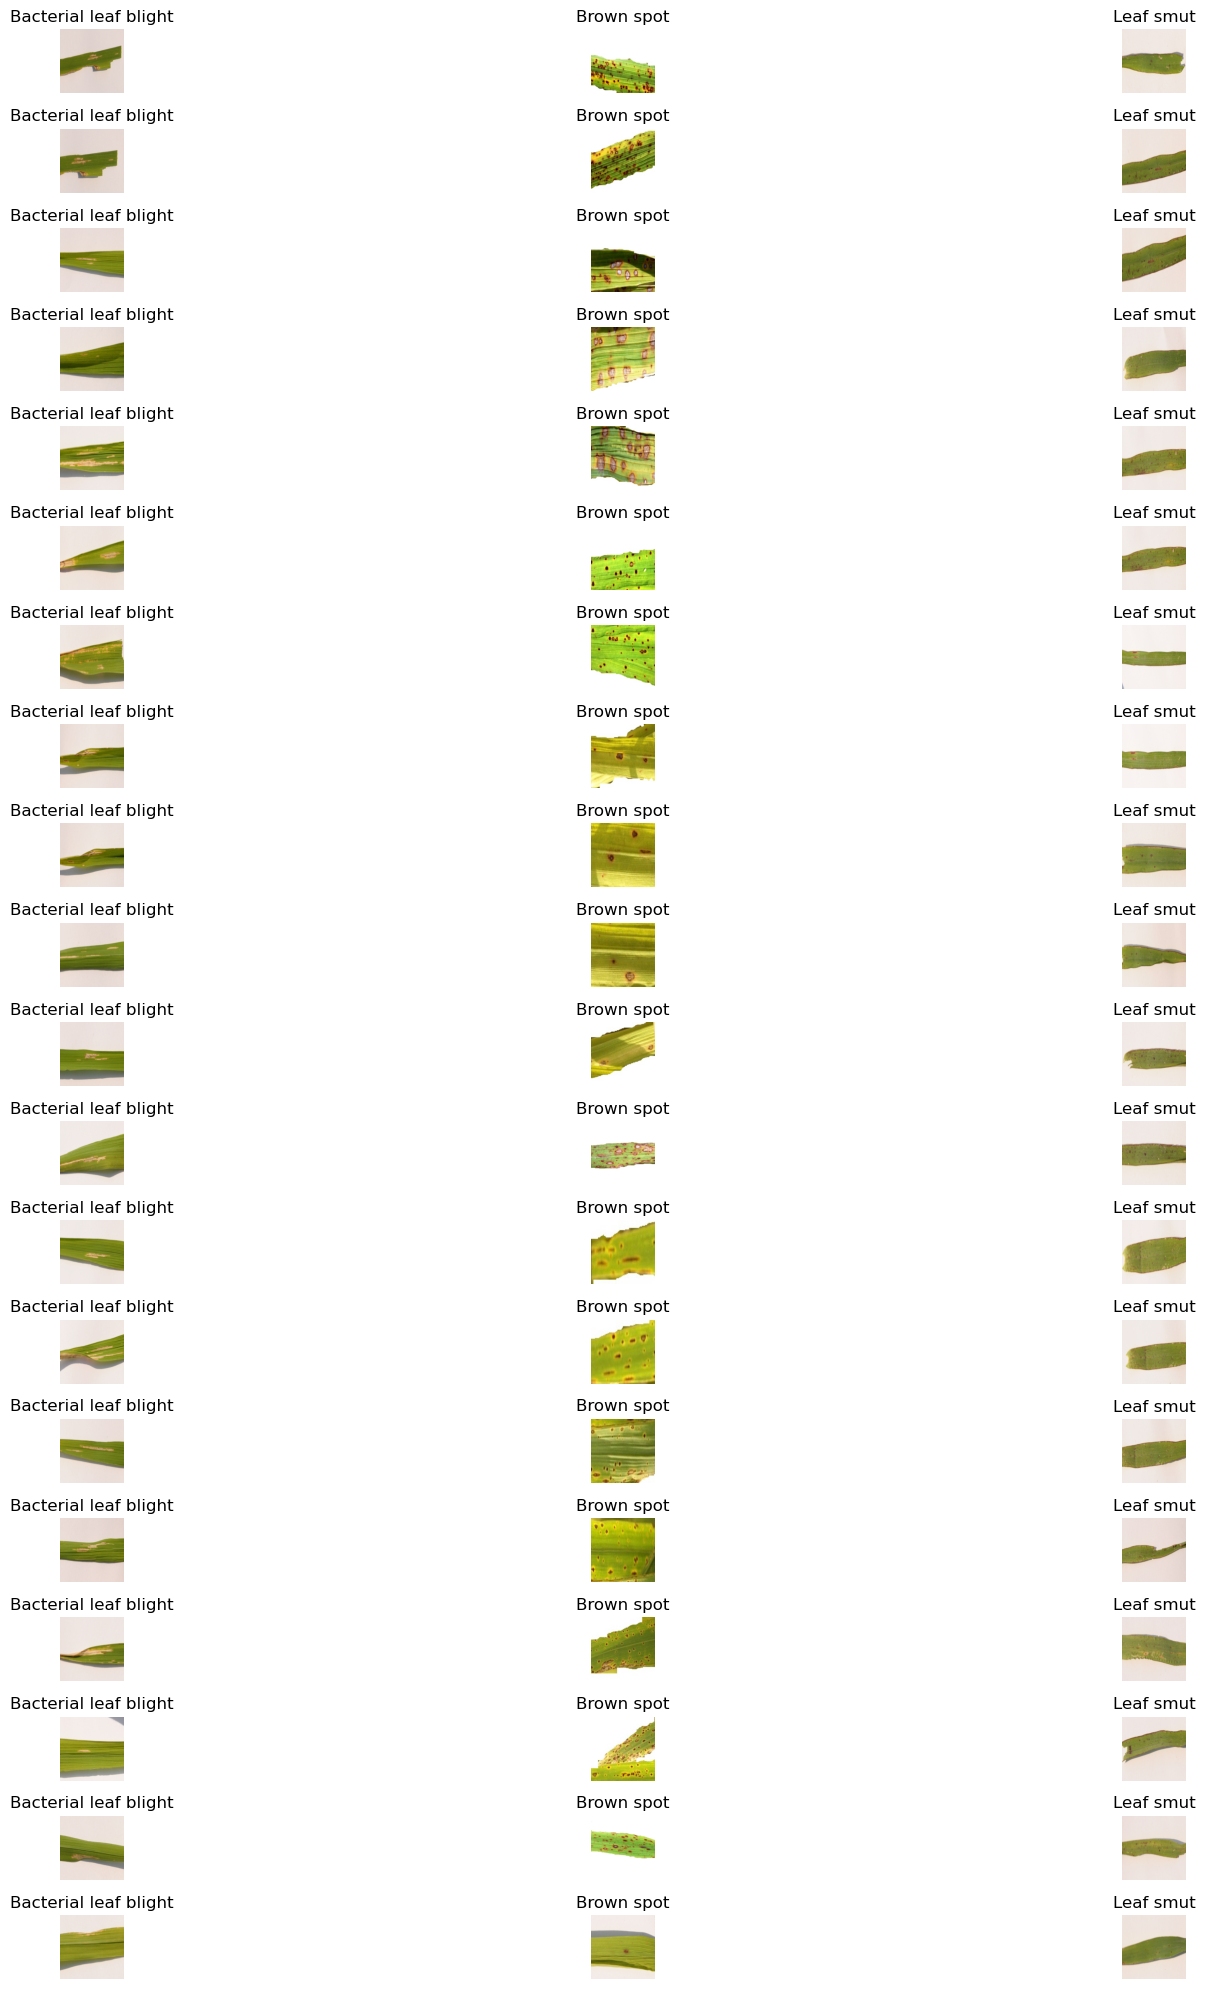

In [10]:
fig,axes = plt.subplots(nrows = no_of_samples,ncols = 3,figsize = (20,20))
for i in range(no_of_samples):
    axes[i,0].imshow(dir1_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')
    axes[i,0].axis('off')
    
    axes[i,1].imshow(dir2_set[i][0])
    axes[i,1].set_title('Brown spot')
    axes[i,1].axis('off')
    
    axes[i,2].imshow(dir3_set[i][0])
    axes[i,2].set_title('Leaf smut')
    axes[i,2].axis('off')
plt.tight_layout()
plt.show()

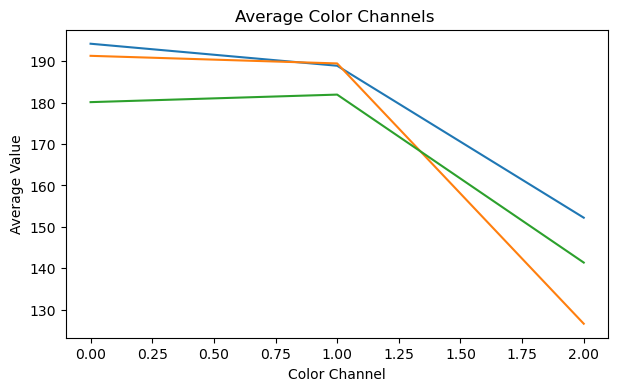

In [11]:
## calculate the average color channels for each class
avg_colors = {}
for class_name,images in {'Bacterial leaf blight':images_dir1,'Brown spot':images_dir2,'Leaf smut':images_dir3}.items():
    avg_color = np.mean([np.mean(img,axis = (0,1)) for img,_ in images],axis=0)
    avg_colors[class_name] = avg_color
plt.figure(figsize=(7,4))
for class_name, avg_color in avg_colors.items():
    plt.plot(avg_color, label = class_name)
plt.xlabel('Color Channel')
plt.ylabel('Average Value')
plt.title('Average Color Channels ')
plt.show()

- The Average color scheme represents that RGB distribution of each disease dataset

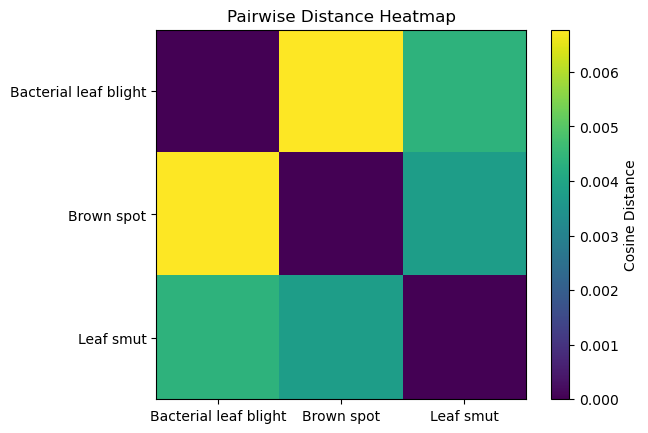

In [12]:
from sklearn.metrics.pairwise import pairwise_distances
class_avg_images = [np.mean([img for img,_ in images],axis = 0) for images in [images_dir1 , images_dir2 , images_dir3]]
class_avg_images_reshaped = [avg_img.reshape(-1) for avg_img in class_avg_images]
distances = pairwise_distances(class_avg_images_reshaped,metric = 'cosine')

plt.imshow(distances,cmap='viridis',interpolation='nearest')
plt.colorbar(label = 'Cosine Distance')
plt.xticks(range(3),['Bacterial leaf blight','Brown spot','Leaf smut'])
plt.yticks(range(3),["Bacterial leaf blight",'Brown spot','Leaf smut'])
plt.title('Pairwise Distance Heatmap')
plt.show()

- The heatmap visualizes how similar and dissimilar the average image patterns are between different classes.
- Darker areas indicates lower cosine distances and greater similarity,where lighter areas indicates higher cosine distances and greater dissimilarity.
- This information helps the relationships and separability of different classes based on visual patterns 

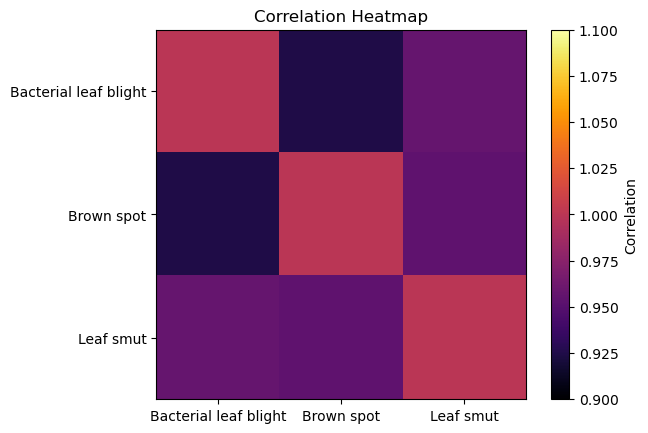

In [13]:
class_avg_images = [np.mean([img for img,_ in images],axis = 0) for images in [images_dir1,images_dir2,images_dir3]]
class_avg_images_flattened = [avg_img.flatten() for avg_img in class_avg_images]
correlations = np.corrcoef(class_avg_images_flattened)

plt.imshow(correlations,cmap='inferno',vmax=1,vmin=1)
plt.colorbar(label = 'Correlation')
plt.xticks(range(3),['Bacterial leaf blight','Brown spot','Leaf smut'])
plt.yticks(range(3),["Bacterial leaf blight",'Brown spot','Leaf smut'])
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [14]:
import keras
from tensorflow.keras.preprocessing.image import img_to_array

In [15]:
x_image = []
y_label = []
for img,label in images_dir1:
    x_image.append(img)
    y_label.append(label)
for img,label in images_dir2:
    x_image.append(img)
    y_label.append(label)
for img,label in images_dir3:
    x_image.append(img)
    y_label.append(label)

- x and y store the image data and class label.
- x is the images and y is the disease

## Converting images into Numpy arrays
- We normalise the dataset of our dataset images.Images are essentially numerical data with pixel values representing colo intensity.
- converting images into Numpy arrays ensures that they can be treated as numerical data by the model

## Rescaling and splitting the data

In [50]:
## converting images and labels to arrays
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_image = np.array(x_image)
y_label = np.array(y_label)
y_encoded = label_encoder.fit_transform(y_label)

In [17]:
x_image.shape

(119, 224, 224, 3)

In [18]:
y_label.shape

(119,)

In [19]:
x_image = x_image / 255.0 ## Rescaling the image pixel by 255

In [20]:
x_image

array([[[[0.89803922, 0.84313725, 0.81960784],
         [0.89411765, 0.83921569, 0.81568627],
         [0.89411765, 0.83529412, 0.81960784],
         ...,
         [0.90196078, 0.83921569, 0.81960784],
         [0.90196078, 0.84313725, 0.81960784],
         [0.89411765, 0.84313725, 0.82352941]],

        [[0.89019608, 0.83921569, 0.81568627],
         [0.89411765, 0.83921569, 0.81960784],
         [0.89803922, 0.83921569, 0.81960784],
         ...,
         [0.89803922, 0.83921569, 0.82352941],
         [0.90196078, 0.84705882, 0.82352941],
         [0.90196078, 0.84313725, 0.82352941]],

        [[0.89019608, 0.83921569, 0.81960784],
         [0.89803922, 0.84313725, 0.81960784],
         [0.89803922, 0.83921569, 0.81960784],
         ...,
         [0.89019608, 0.83921569, 0.81960784],
         [0.89803922, 0.84705882, 0.81960784],
         [0.90588235, 0.84313725, 0.82352941]],

        ...,

        [[0.89803922, 0.84313725, 0.82352941],
         [0.89411765, 0.84313725, 0.81568627]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_image,y_encoded,test_size=0.2,random_state=42)

In [22]:
print(X_train.shape)

(95, 224, 224, 3)


In [23]:
y_train.shape

(95,)

In [48]:
y_encoded  ## check the assigned classes for the trained data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

- where
    - 0 represents Bacterial leaf blight
    - 1 represents Brown spot
    - 2 represents Leaf smut

## Model Architecture

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,Dropout

- relu - the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network.
- It has a derivative of either 0 or 1, depending on whether its input is negative or not

In [25]:
## Creating a sequential instance
model = Sequential()

## Adding convolutional Layers to the Sequential
model.add(Conv2D(32,kernel_size=(3,3),input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) ## Applying MaxPooling on Convolution Layer

model.add(Conv2D(64,kernel_size=(3,3),input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,kernel_size=(3,3),input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())  # Applying Flattening to convert into One Dimension as input layer
model.add(Dense(128)) 
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(len(label_encoder.classes_)))
model.add(Activation('softmax')) # Adding an Output Layer
          
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

## Compile the model

In [26]:
from tensorflow.keras.optimizers import Adam

In [27]:
model.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

- Adam optimizer is used for optimization during training
- if loss is categorical_crossentropy there is an error of image size. 
- Sparse categorical cross-entropy is an extension of the categorical cross-entropy loss function that is used when the output labels are represented in a sparse matrix format.
- metrics = ['accuracy'] : During training and evaluation, the accuracy metric will be calculated.

## Model training and testing

- epoch(n) : The training process will iterate through the entire training dataset n number of times
- epoch 30 and dense 256 gave me an accuracy of 0.3
- but dense 128 performs the same
- epoch 10 gave accuracy of 0.3-0.5
- epoch 30 gives a test accuracy of 0.5-0.8

In [28]:
## model training
history = model.fit(X_train,y_train,epochs = 30, batch_size=32, validation_split=0.2)

## testing the model
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/30


3/3 [==============================] - 16s 3s/step - loss: 1.3469 - accuracy: 0.3158 - val_loss: 1.2347 - val_accuracy: 0.2632
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 1.2248 - accuracy: 0.3421 - val_loss: 1.3145 - val_accuracy: 0.2632
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 1.0121 - accuracy: 0.4868 - val_loss: 1.0284 - val_accuracy: 0.5263
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 0.9704 - accuracy: 0.5921 - val_loss: 1.3359 - val_accuracy: 0.2632
Epoch 5/30
3/3 [==============================] - 5s 1s/step - loss: 0.8856 - accuracy: 0.5789 - val_loss: 1.0362 - val_accuracy: 0.4211
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 0.8683 - accuracy: 0.5921 - val_loss: 1.1759 - val_accuracy: 0.3158
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.7897 - accuracy: 0.5789 - val_loss: 1.1286 - val_accuracy: 0.3158
Epoch 8/30
3/3 [======================

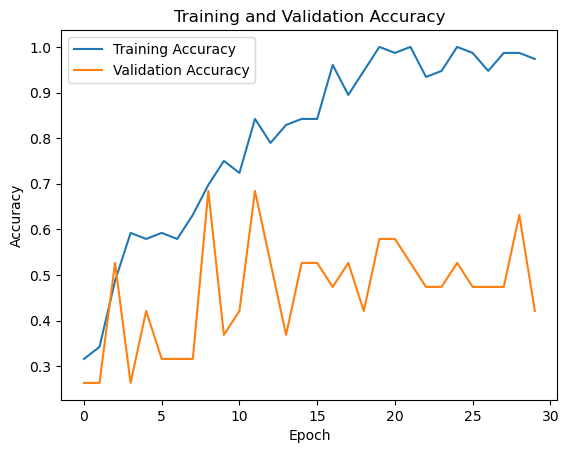

1/1 [==============================] - 0s 270ms/step


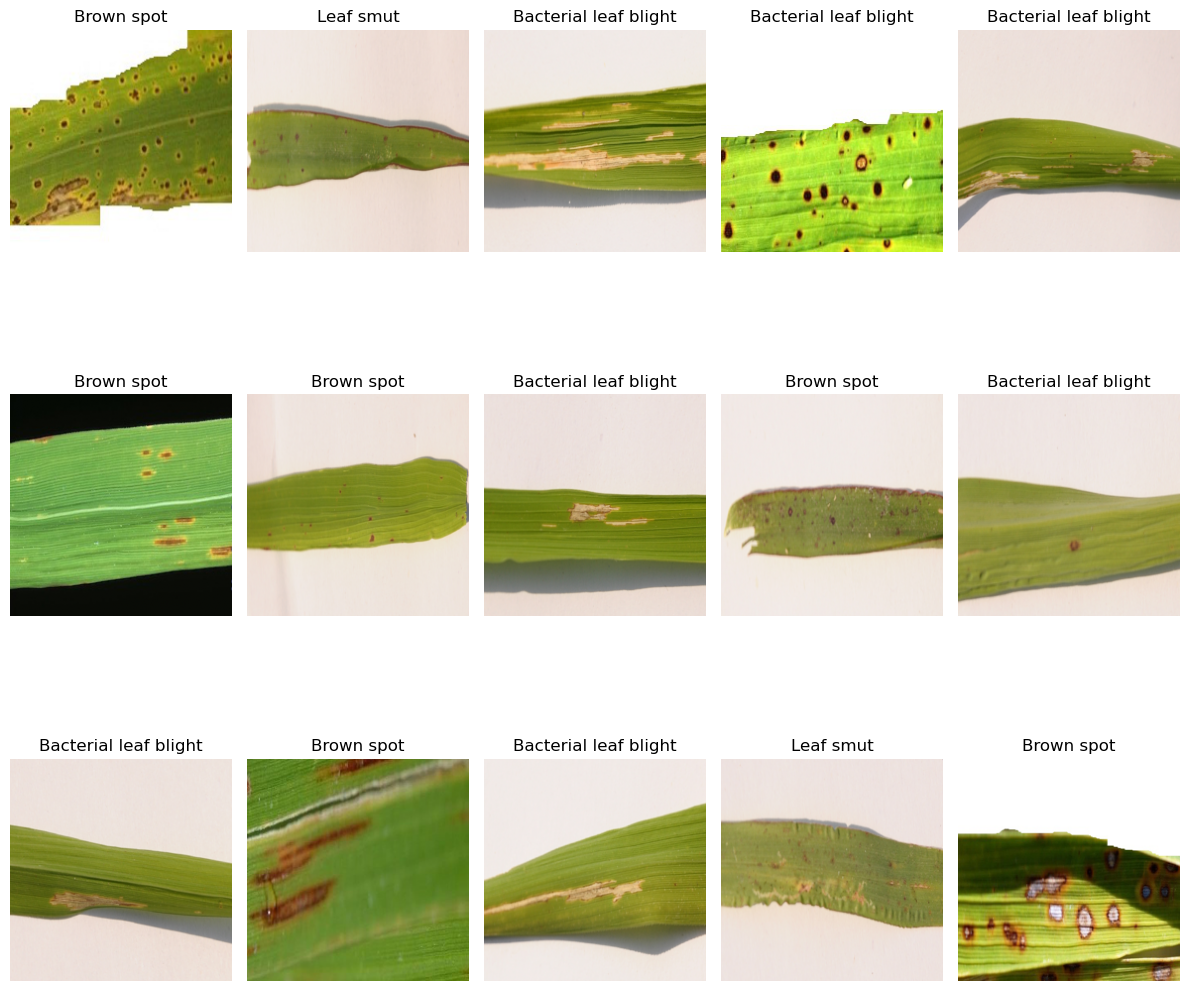

In [51]:
## plot training and validation accuracy
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions,axis = 1)

predicted_class_labels = label_encoder.inverse_transform(predicted_labels)

plt.figure(figsize=(12,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[i])
    plt.title(predicted_class_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning
- for hyperparameter tuning we will possibly use,learning rate and data augmentation

## 1. Learning Rate

In [52]:
## hyperparameter tuning - learning rate
learning_rate = 0.0001

In [53]:
model1 = Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),input_shape = (224,224,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(64,kernel_size=(3,3),input_shape = (224,224,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(128,kernel_size=(3,3),input_shape = (224,224,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(len(label_encoder.classes_)))
model1.add(Activation('softmax'))
          
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_6 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [54]:
optimizer = Adam(learning_rate=learning_rate)

In [55]:
model1.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
history1 = model1.fit(X_train,y_train,epochs = 30, batch_size=32, validation_split=0.2)

## testing the model
test_loss1,test_accuracy1 = model1.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/30
3/3 [==============================] - 8s 2s/step - loss: 4.8062 - accuracy: 0.2763 - val_loss: 1.3761 - val_accuracy: 0.2632
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 1.3371 - accuracy: 0.3026 - val_loss: 1.0878 - val_accuracy: 0.3158
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 1.1054 - accuracy: 0.4342 - val_loss: 1.1924 - val_accuracy: 0.2105
Epoch 4/30
3/3 [==============================] - 5s 1s/step - loss: 1.0593 - accuracy: 0.4474 - val_loss: 1.1646 - val_accuracy: 0.2105
Epoch 5/30
3/3 [==============================] - 5s 1s/step - loss: 1.1207 - accuracy: 0.3684 - val_loss: 1.1378 - val_accuracy: 0.2105
Epoch 6/30
3/3 [==============================] - 5s 1s/step - loss: 1.0316 - accuracy: 0.4737 - val_loss: 1.2069 - val_accuracy: 0.3158
Epoch 7/30
3/3 [==============================] - 5s 1s/step - loss: 1.0006 - accuracy: 0.5658 - val_loss: 1.1765 - val_accuracy: 0.2105
Epoch 8/30
3/3 [=========================

## 2. Data Augmentation

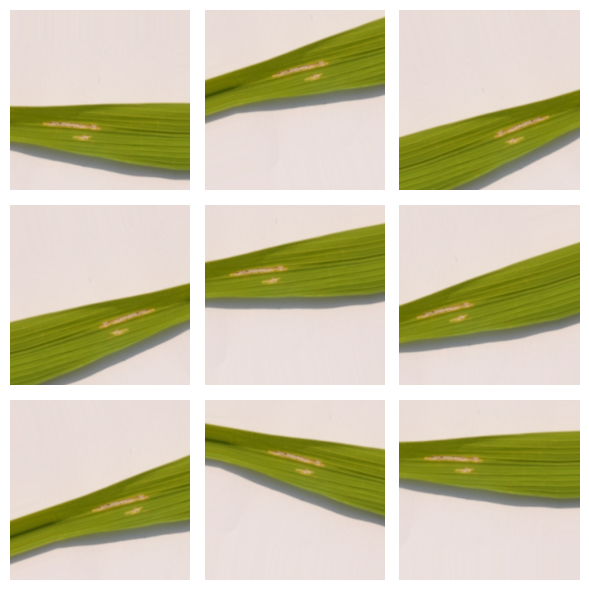

In [66]:
## Visualizing Augmented Images
## We visualize augmented images to ensure they still represent the original classes.
## This has to be done in Data Visualization section.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
sample_image = x_image[2]
sample_image = np.expand_dims(sample_image, axis = 0)

plt.figure(figsize=(6,6))
for i,augmented_size in enumerate(data_generator.flow(sample_image,batch_size=1)):
    plt.subplot(3,3,i+1)
    plt.imshow(augmented_size[0])
    plt.axis('off')
    if i==8:
        break
plt.tight_layout()
plt.show()

In [78]:
def create_model(input_shape,num_classes):
    model2 = Sequential()
    
    model2.add(Conv2D(32,kernel_size=(3,3),input_shape = (224,224,3)))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size = (2,2)))

    model2.add(Conv2D(64,kernel_size=(3,3),input_shape = (224,224,3)))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size = (2,2)))

    model2.add(Conv2D(128,kernel_size=(3,3),input_shape = (224,224,3)))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size = (2,2)))

    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))
    model2.add(Dropout(0.5))

    model2.add(Dense(num_classes))
    model2.add(Activation('softmax'))
    
    model2.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model2

In [79]:
datagen = ImageDataGenerator(
          rotation_range=45,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

- rotation_range : an angle where the image is rotated and the algorithm is run.It goes from -45 to 45(example)
- width & height_shift_range : randomly shifting the image horizontally or vertically.This helps the model tolerate small translations in the input data.
- shear_range : maximum range of shear on the axis
- fill_mode : "nearest","constant","reflect",and "wrap".

In [80]:
input_shape = (224,224,3)
num_classes = len(label_encoder.classes_)
model_data = create_model(input_shape,num_classes)

In [81]:
augmented_data = datagen.flow(X_train,y_train,batch_size=32)

In [84]:
history2 = model_data.fit(augmented_data,epochs=30,steps_per_epoch=len(X_train)/32,validation_data=(X_test,y_test))

Epoch 1/30
2/2 [==============================] - 6s 2s/step - loss: 0.9180 - accuracy: 0.5895 - val_loss: 0.7927 - val_accuracy: 0.5833
Epoch 2/30
2/2 [==============================] - 7s 2s/step - loss: 0.9588 - accuracy: 0.4842 - val_loss: 0.8664 - val_accuracy: 0.4583
Epoch 3/30
2/2 [==============================] - 7s 2s/step - loss: 0.9560 - accuracy: 0.5053 - val_loss: 1.0048 - val_accuracy: 0.6250
Epoch 4/30
2/2 [==============================] - 7s 2s/step - loss: 1.0012 - accuracy: 0.5684 - val_loss: 0.9610 - val_accuracy: 0.6250
Epoch 5/30
2/2 [==============================] - 7s 2s/step - loss: 0.9437 - accuracy: 0.4211 - val_loss: 0.8772 - val_accuracy: 0.4583
Epoch 6/30
2/2 [==============================] - 6s 2s/step - loss: 0.8988 - accuracy: 0.4526 - val_loss: 0.8204 - val_accuracy: 0.6667
Epoch 7/30
2/2 [==============================] - 7s 2s/step - loss: 0.8047 - accuracy: 0.5895 - val_loss: 0.7639 - val_accuracy: 0.7917
Epoch 8/30
2/2 [=========================

In [85]:
test_loss2,test_accuracy2 = model_data.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy2:.4f}")

1/1 [==============================] - 0s 292ms/step - loss: 0.5922 - accuracy: 0.8333
Test Accuracy: 0.8333


## MLP(Multi-Layer Perceptron)

In [86]:
from sklearn.neural_network import MLPClassifier
X_train_flattened = X_train.reshape(X_train.shape[0],-1)
X_test_flattened = X_test.reshape(X_test.shape[0],-1)
model_mlp = MLPClassifier(hidden_layer_sizes=(20,2),learning_rate_init=0.001,max_iter=75,random_state=42)
model_mlp.fit(X_train_flattened,y_train)

MLPClassifier(hidden_layer_sizes=(20, 2), max_iter=75, random_state=42)

In [89]:
from sklearn.metrics import classification_report
y_pred = model_mlp.predict(X_test_flattened)
class_report = classification_report(y_test,y_pred,target_names=label_encoder.classes_)
print(class_report)

                       precision    recall  f1-score   support

Bacterial leaf blight       0.29      1.00      0.45         7
           Brown spot       0.00      0.00      0.00         8
            Leaf smut       0.00      0.00      0.00         9

             accuracy                           0.29        24
            macro avg       0.10      0.33      0.15        24
         weighted avg       0.09      0.29      0.13        24



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Optimizing Model

In [92]:
from kerastuner.tuners import RandomSearch

C:\Users\Dell\AppData\Local\Temp\ipykernel_10888\3126117800.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [91]:
!pip install keras_tuner

  Obtaining dependency information for keras_tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   ------------------------- -------------- 81.9/128.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 122.9/128.9 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 122.9/128.9 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 128.9/128.9 kB 690.0 kB/s eta 0:00:00


In [102]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [107]:
def build_model(hp):
    model3 = keras.Sequential()
    model3.add(layers.Flatten(input_shape=(224,224,3)))
    for i in range(hp.Int('num_layers',1,3)):
        model3.add(layers.Dense(units=hp.Int('units_'+str(i),min_value = 16,max_value = 128,step = 16),activation='relu'))
    model3.add(layers.Dense(len(label_encoder.classes_),activation='relu'))
    model3.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model3

In [108]:
tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=20,
        directory='keras_tuner_dir',
        project_name='rice_leaf_classification')

In [109]:
tuner.search(X_train,y_train,validation_split=0.2,epochs=10)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 20 Complete [00h 00m 10s]
val_loss: 9.176356315612793

Best val_loss So Far: 1.0986123085021973
Total elapsed time: 00h 05m 07s


In [110]:
test_loss3,test_accuracy3 = best_model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy3:.4f}")

1/1 [==============================] - 0s 473ms/step - loss: 1.0986 - accuracy: 0.2917
Test Accuracy:0.2917


In [112]:
y_pred1 = best_model.predict(X_test)
predicted_labels1 = np.argmax(y_pred1, axis=1)
predicted_class_labels1 = label_encoder.inverse_transform(predicted_labels1)

class_report1 = classification_report(y_test,predicted_labels1,target_names=label_encoder.classes_)
print(class_report1)

1/1 [==============================] - 0s 258ms/step
                       precision    recall  f1-score   support

Bacterial leaf blight       0.29      1.00      0.45         7
           Brown spot       0.00      0.00      0.00         8
            Leaf smut       0.00      0.00      0.00         9

             accuracy                           0.29        24
            macro avg       0.10      0.33      0.15        24
         weighted avg       0.09      0.29      0.13        24



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Comparison
- Main CNN model provides an accuracy of 66%
- Learning of 0.001 provide 70% accuracy and it deterioates when the learning rate increases
- Data Augmentation provides an accuracy of 83%
- MLP was unable to identify all the disease classifications
- Random Search is also able to identify only one class

- In conclusion CNN with Data Augmentation provides the best possible result.

## Challenges Faced
- The dataset is limited,train and testing is limited as well
- Limited knowledge on Deep Learning algorithms to implement on Image processing
- Image shape,array and convertion error was hard to understand and it took a certain amount of time to understand the code and implement the data
- When compiling the model,the optimizer,loss and metrics has to be fixed when changed there is an error in the output
- loss = sparse_categorical_crossentropy, when just categorical_crossentropy is used there is an error in output and disrupts the flow process as our labels are class encoded
- In hyperparameter tuning,MLP and RandomSearch can only identify one class,when the input are changed the class identification varies but still only one class
- With limited dataset various models and hyperparameters were not able to be implemented as testing and validation data is required more..